In [1]:
!pip install torch
!pip install torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn import metrics
from sklearn.datasets import fetch_openml

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((70000, 784), (70000,))

In [3]:
x_data = mnist.data
y_data = mnist.target.astype(int)



In [4]:
from sklearn.model_selection import train_test_split

device = 'cuda'
X_train,X_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)
X_train,X_test = torch.Tensor(X_train.values),torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values),torch.Tensor(y_test.values)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([14000, 784])
torch.Size([56000])
torch.Size([14000])


In [5]:
import torch
class LogisticRegression(torch.nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LogisticRegression, self).__init__()
    self.linear= torch.nn.Linear(input_dim, output_dim)
  def forward(self,x):
    outputs = torch.sigmoid(self.linear(x))
    return outputs
    

In [6]:
epochs = 10000
input_dim = 784
output_dim = 10
lr = 0.001
model = LogisticRegression(input_dim, output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr=lr)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

train_losses = []
test_losses = []

for i in range(epochs):
  # train
  model.train()
  train_output = model(X_train)
  train_loss = criterion(train_output,y_train.long())

  # test
  model.eval()
  test_output = model(X_test)
  test_loss = criterion(test_output,y_test.long())

  # 기록
  if i % 10 == 0:
    train_losses.append(train_loss.data)
    test_losses.append(test_loss.data)
  
  # 출력 
  if (i % 1000 == 0)&(i!=0):
    print("=====")
    print('epoch',i)
    _, pred = torch.max(train_output.data, axis=1)
    print("train_accuracy {:0.3f}".format(float((pred == y_train).sum())/y_train.size(0)))

    with torch.no_grad():
      _, pred = torch.max(test_output.data,axis=1)
      print("test_accuracy {:0.3f}".format(float((pred == y_test).sum())/y_test.size(0)))

  # 갱신
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()



=====
epoch 1000
train_accuracy 0.901
test_accuracy 0.896
=====
epoch 2000
train_accuracy 0.901
test_accuracy 0.896
=====
epoch 3000
train_accuracy 0.901
test_accuracy 0.896
=====
epoch 4000
train_accuracy 0.901
test_accuracy 0.897
=====
epoch 5000
train_accuracy 0.902
test_accuracy 0.897
=====
epoch 6000
train_accuracy 0.902
test_accuracy 0.897
=====
epoch 7000
train_accuracy 0.902
test_accuracy 0.897
=====
epoch 8000
train_accuracy 0.902
test_accuracy 0.897
=====
epoch 9000
train_accuracy 0.902
test_accuracy 0.897


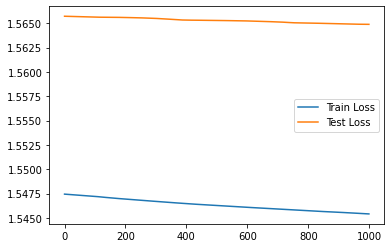

In [17]:
# 10 epoch 마다 기록한 loss plot 으로 그리기

plt.plot([e.to("cpu") for e in train_losses],label='Train Loss')
plt.plot([e.to("cpu") for e in test_losses], label='Test Loss')
plt.legend()

